<h1 style="text-align: center;">Prueba - Hito 2 - Desafío 1: Determinantes del ingreso</h1>
<p>Óscar Aguilera Badilla - G59</p>

## Preliminares
### Decripción del problema
- Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza
extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo.
- Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de
atributos sociodemográficos.

### Objetivos
- Encontrar un modelo predictivo que permita determinar la probabilidad de que una persona presenta salarios sobre los 50.000 dólares anuales, basado en ciertos actributos que influyen en esta probabilidad.

### Desarrollo

- El vector objetivo es la celda income la cuál se pretenden predecir en probabilidad. Cómo es una dato binario, se trata de un problema de clasificiación.
- Preprosesamiento: 
    - Cambiar signos por nulos
    - Determinar qué datos o qué columna eliminar en base a la cantidad de nulos.
    - Recodificación de variables según lo señala el problema. 
    - Recategorización de variables: Establacer valores numéricos binarios,    

- Modelo a utilizar: regresión logística ya que el vector objetivo es binario
- Determinar variables significativas:
    - Correr modelo de regresión logística
    - Depurar las variables: Dejar variables significativas a través de pValue 
    - Se simplifica el modelo, se entrena el modelo logistico con estas variables.
-Entrenamiento:
    - Entrenamiento supervizado con división de data set para entrenamiento y pruebas.
- Revisión modelo: puntaje f1, accuracy. 
- Evaluación del desempeño del modelo reducido versus al total con log verosimilitud.
- Matriz de confusión y luego se calcula la precisión para determinar qué tan bueno está el modelo y si hace lo que estamos necesitando.
- Curva Roc, permite evaluar el rango de error del modelo y la relación entre falsos positivios y falsos negativos. 
- Variación del modelo para ajustar su desempeño.

### Librerías a usar

- pandas y numpy: para trabajar el dataframe, manejar y convertir los datos. Analizar a grandes rasgos la caracteristica de las variables.
- seaborn y matplotlib: Para obtener distintos gráficos que nos permitan analizar el comportamiento y correlación de las variables.
- statsmodel: analizar comportamiento estadístico, determinación de variables significativas y creación del modelo
- sklearn: librería de machine learning para entrenar el modelo descrito, estandarizar y utilización de métricas para evaluar calidad del modelo. 
- warning: Librería que permite eliminar mensajes no desedos respecto a las deprecación
- funciones propias: Archivo con funciones propias para automatizar procesos comunes.




##  Anáilisis descriptivo
A continuación se realiza la inspección visual del vector objetivo y de las variables independientes para realizar un análisis descriptivo de las mismas, determinar su tipo y la manera en que se distribuyen.

In [1]:
# Se importan las librerías a utilizad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgno 
import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.style.use('seaborn')

#Funciones propias
import funciones_propias as fp

# Importación del DataFrame de datos: 

df = pd.read_csv('../data/income-db.csv')

#Revisión general de las primeras filas de datos
df.head(20)



C:\Windows\Temp\ipykernel_12412\2405795611.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


<Axes: >

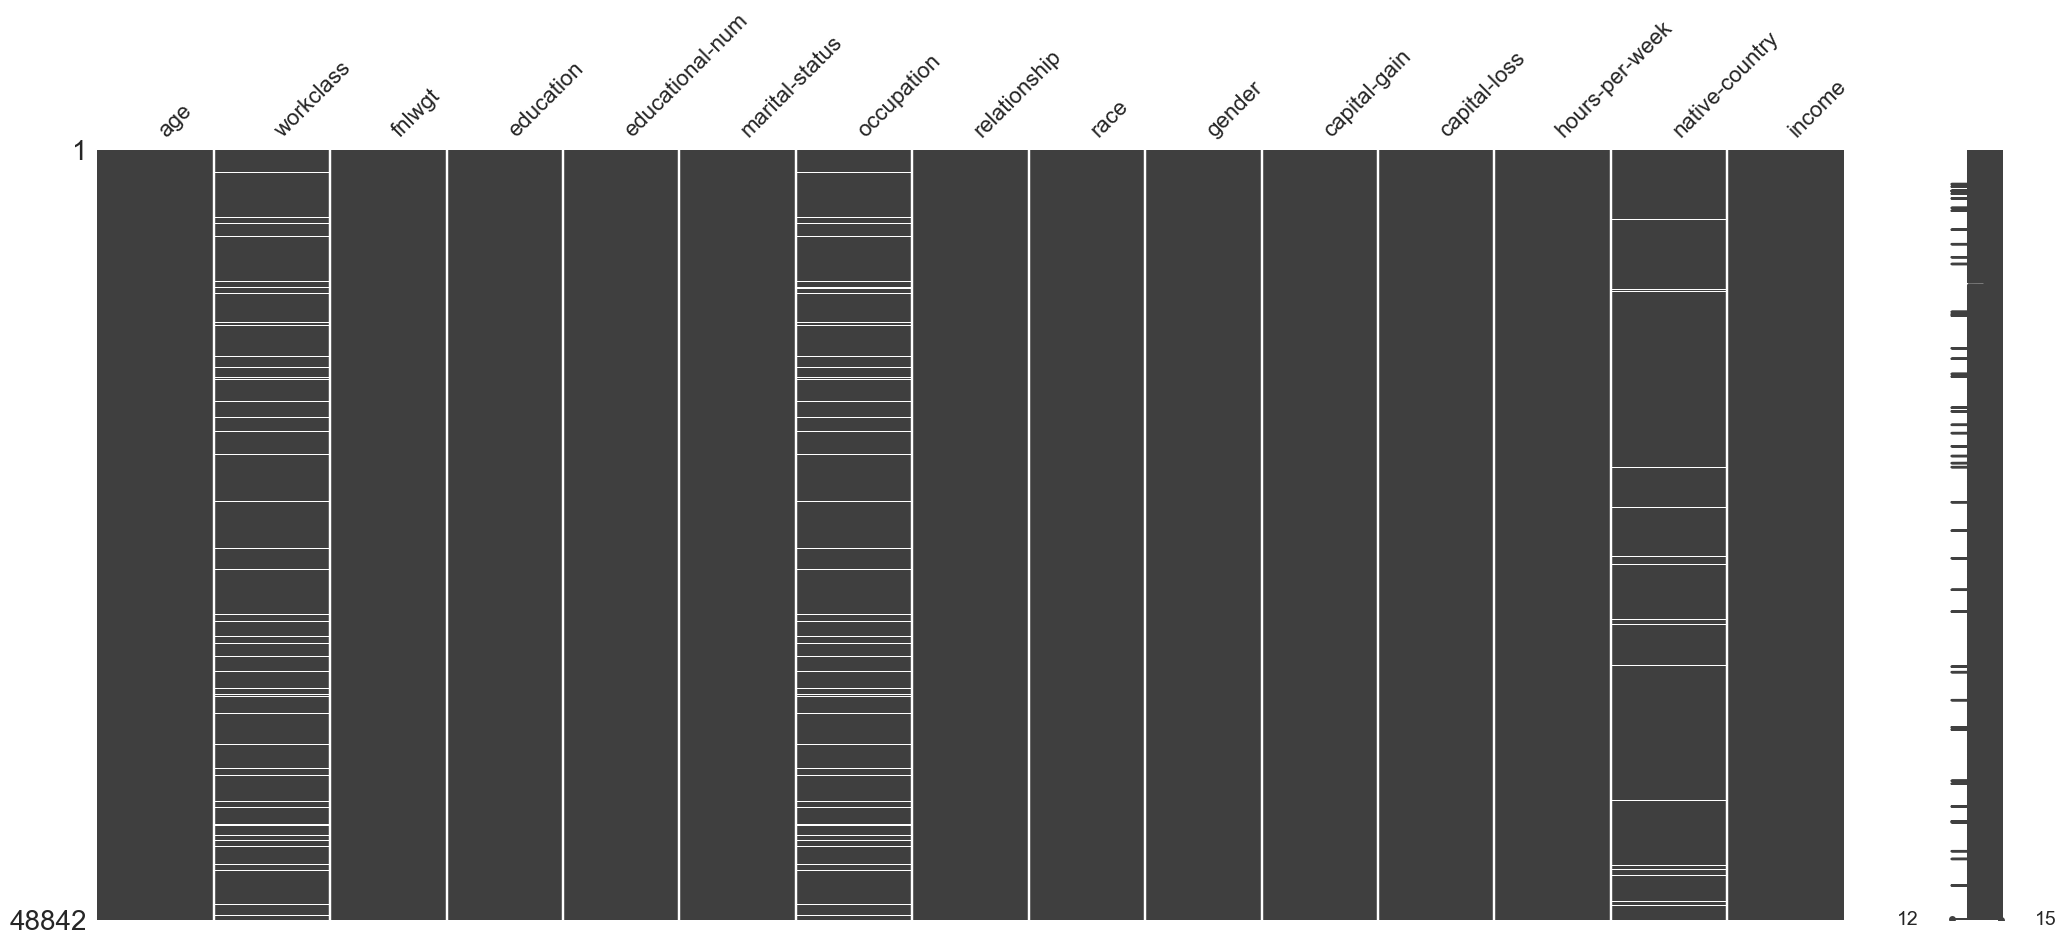

In [2]:
# Se reemplazan los valores que contengan el signo '?' ya que estos representan datos perdidos a valor NaN. 
df = df.replace('?', np.nan)
msgno.matrix(df) # Se muestra un esquema con los datos NaN para observarlos y decidir qué hacer con esa columna.

In [3]:
# Las columnas workclass, occupation y native-counrty presentan datos perdidos

df_len = len(df)

for col in ['workclass','occupation','native-country']:
    nans = df[col].isna().sum()
    print(f' La columna {col} presenta {nans} datos perdidos y representa el {round(100*nans/df_len,3)}% del total de datos')

 La columna workclass presenta 2799 datos perdidos y representa el 5.731% del total de datos
 La columna occupation presenta 2809 datos perdidos y representa el 5.751% del total de datos
 La columna native-country presenta 857 datos perdidos y representa el 1.755% del total de datos


Según los resultados referentes a los valores nulos, se establece que es posible eliminar las filas con estos valores y continuar el análisis sin ellas.

<Axes: >

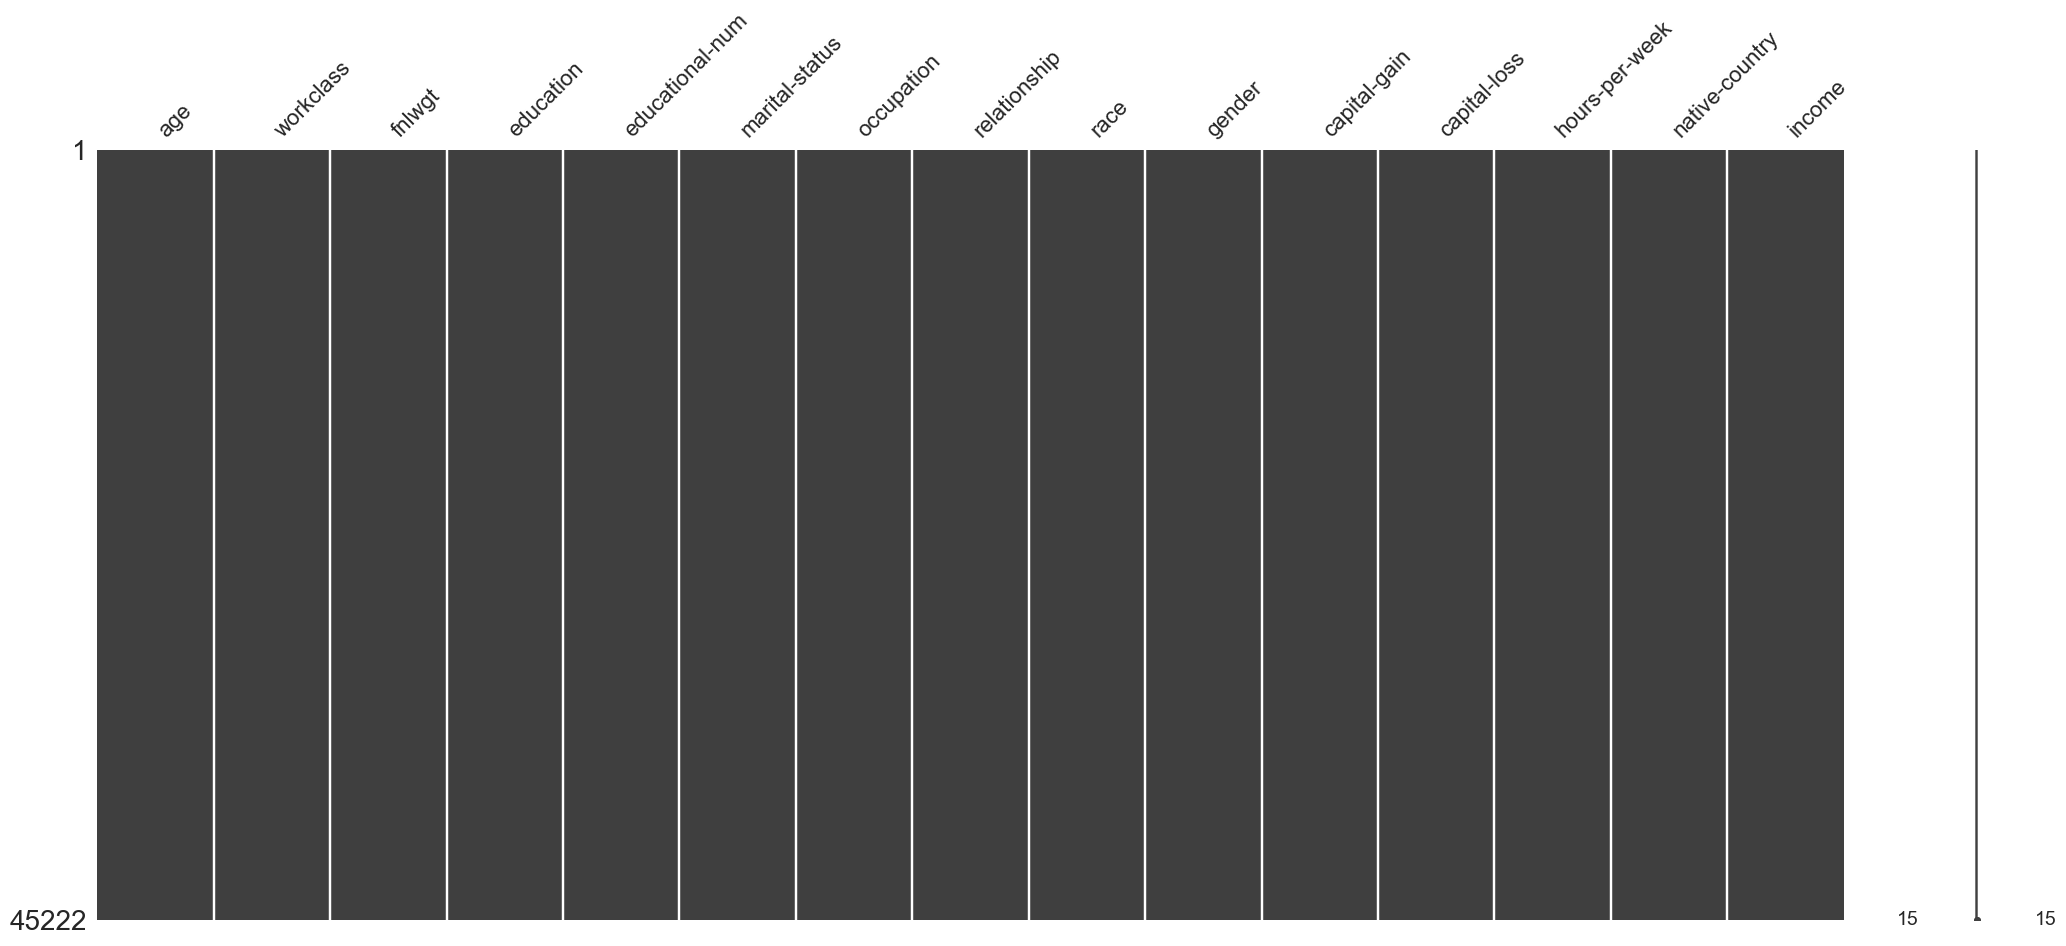

In [4]:
# Limpieza da datos perdidos: Se eliminan los datos perdidos y se continúa con todas las columnas ya que no representan un gran porcentaje del total. 
df = df.dropna()
msgno.matrix(df)

In [5]:
# Separamos todas las variables que son categóricas
categorical_columns = ['workclass', 'education', 'occupation',	'relationship',	'race',	'gender', 'native-country','income']
# iniciamos un loop para cada variable categórica donde:
for cat in categorical_columns:
    # imprimimos el nombre
    print("\n",cat)
    # solicitamos la frecuencia relativa de cada categoría dentro de la variable
    print(df[cat].value_counts())
    # solicitamos el porcentaje de la frecuencia relativa
    print((df[cat].value_counts()/len(df[cat])))


 workclass
workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64
workclass
Private             0.736522
Self-emp-not-inc    0.083941
Local-gov           0.068551
State-gov           0.043032
Self-emp-inc        0.036398
Federal-gov         0.031091
Without-pay         0.000464
Name: count, dtype: float64

 education
education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64
education
HS-grad         0.326898
Some-college    0.218898
Bachelors       0.167396
Masters         0.055592
Assoc-voc       0.0

### Visualización de los datos
A continuación se realiza la visualización de cada columna y la del vector objetivo con el objetivo de analizar su distribución y comportamiento según el tipo de dato.

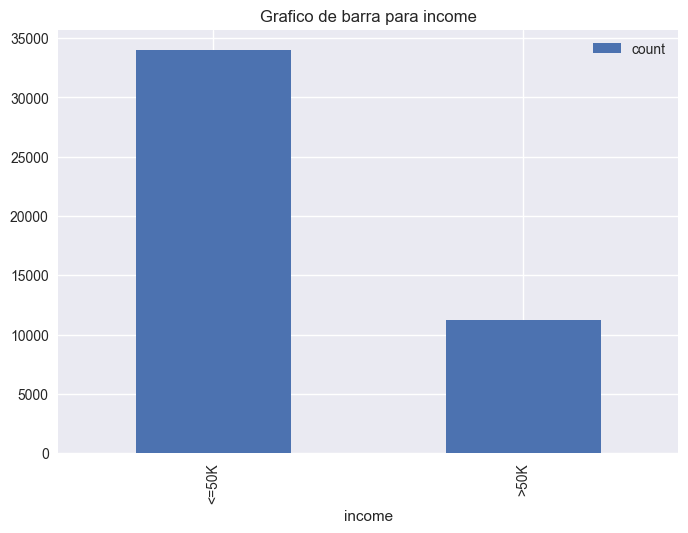

In [6]:
fp.plot_freq(df, "income")

**Comentario:** La variable income tiene muchas observaciones de <=50k, lo que puedo crear un desbalance cuando se cree el modelo, habria que fijarse en las metricas que se obtengan

In [7]:
df["income"] = np.where(df["income"] == ">50K", 1, 0)

In [8]:
def cambio_nombre_col(data, var, n_var):
    data.rename(columns={var:n_var}, inplace=True)

In [9]:
cambio_nombre_col(df,'occupation','collars')

In [10]:
df = df.replace(["Prof-specialty", "Exec-managerial", "Adm-clerical", "Sales", "Tech-support"], 
                ["white-collar", "white-collar", "white-collar", "white-collar", "white-collar"])


In [11]:
df = df.replace(["Craft-repair", "Machine-op-inspct", "Transport-moving", "Handlers-cleaners", "Farming-fishing", 
                 "Protective-serv", "Priv-house-serv"], ["blue-collar", "blue-collar", "blue-collar", "blue-collar", 
                 "blue-collar", "blue-collar", "blue-collar"])

In [12]:
df = df.replace(["Other-service", "Armed-Forces"], ["c_others", "c_others"])


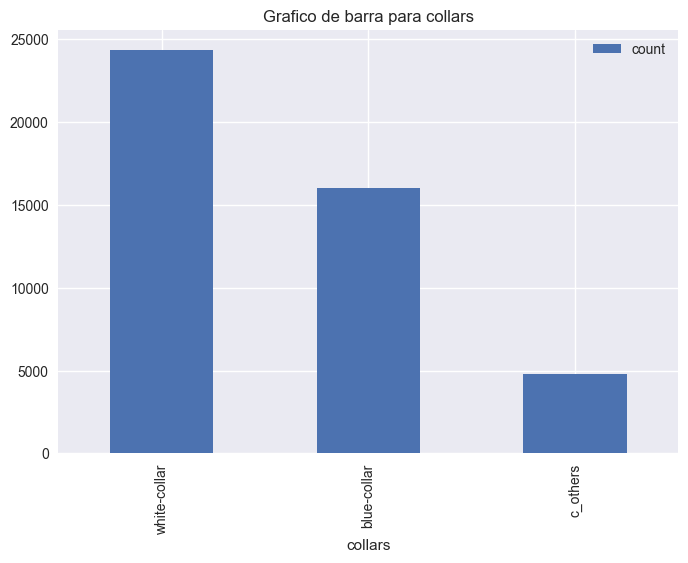

In [13]:
fp.plot_freq(df, "collars")

**Comentario:** La variable white-collar es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas observaciones en others, esta incluido fuerzas armadas, no se como se habra tomado la muestra, pero generalmente son pocos en una sociedad, y tambien yo hubiera pensado que blue collars tendria mas porque tiene mas clases y es mas variada

In [14]:
df["blue-collar"] = np.where(df["collars"] == "blue-collar", 1, 0)
df["c_others"] = np.where(df["collars"] == "c_others", 1, 0)

In [15]:
cambio_nombre_col(df, "workclass", "workclass_recod")

In [16]:
df = df.replace(["Federal-gov"], ["federal-gov"])


In [17]:
df = df.replace(["State-gov","Local-gov"], ["state-level-gov","state-level-gov"])


In [18]:
df = df.replace(["Self-emp-inc","Self-emp-not-inc"], ["self-employed","self-employed"])

In [19]:
df = df.replace(["Never-worked","Without-pay"], ["unemployed","unemployed"])

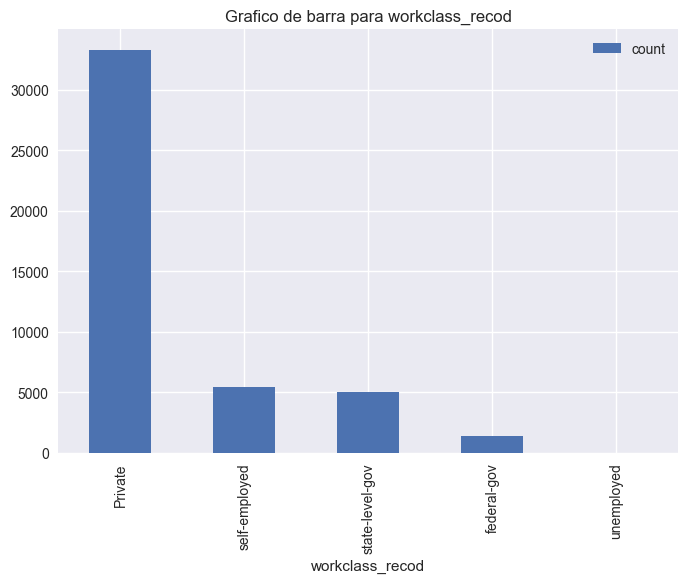

In [20]:
fp.plot_freq(df, "workclass_recod")

**Comentario:** La variable Private es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas observaciones en unemployed (21), la mayoria trabaja en el sector privado

In [21]:
df["self-employed"] = np.where(df["workclass_recod"] == "self-employed", 1, 0)
df["state-level-gov"] = np.where(df["workclass_recod"] == "state-level-gov", 1, 0)
df["federal-gov"] = np.where(df["workclass_recod"] == "federal-gov", 1, 0)
df["unemployed"] = np.where(df["workclass_recod"] == "unemployed", 1, 0)

In [22]:
cambio_nombre_col(df, "education", "educ_recod")

In [23]:
df = df.replace(["Preschool"], ["preschool"])

In [24]:
df = df.replace(["1st-4th", "5th-6th"], ["elementary-school","elementary-school"])

In [25]:
df = df.replace(["7th-8th", "9th", "10th", "11th", "12th", "HS-grad"], ["high-school","high-school", "high-school", "high-school", "high-school", "high-school"])

In [26]:
df = df.replace(["Assoc-voc","Assoc-acdm", "Some-college"], ["college","college", "college"])

In [27]:
df = df.replace(["Bachelors","Masters", "Prof-school", "Doctorate"], ["university","university", "university", "university"])

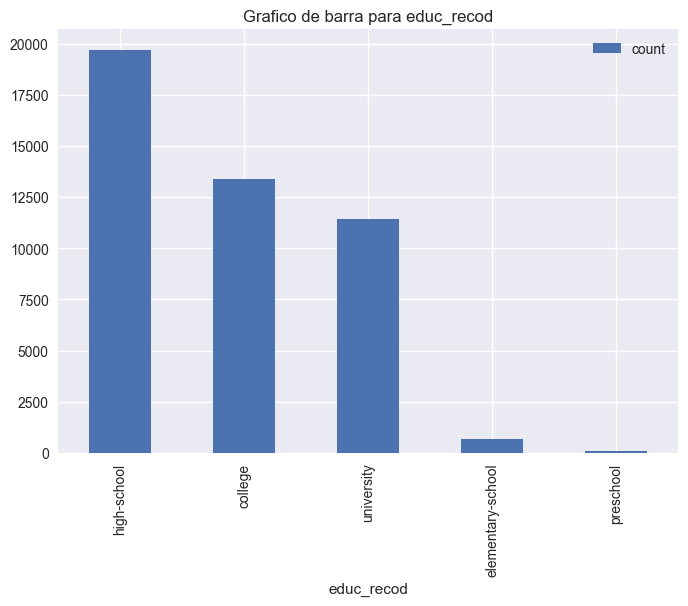

In [28]:
fp.plot_freq(df, "educ_recod")

**Comentario:** La variable high-school es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas las personas tienen grado preescolar y elemental, la mayoria termino o llego hasta la secundaria. Aunque si se suma el college y university, hay mas gente que estudio despues de la secundaria

In [29]:
df["college"] = np.where(df["educ_recod"] == "college", 1, 0)
df["university"] = np.where(df["educ_recod"] == "university", 1, 0)
df["elementary-school"] = np.where(df["educ_recod"] == "elementary-school", 1, 0)
df["preschool"] = np.where(df["educ_recod"] == "preschool", 1, 0)

In [30]:
cambio_nombre_col(df, "marital-status", "civstatus")

In [31]:
df = df.replace(["Married-civ-spouse","Married-spouse-absent", "Married-AF-spouse"], ["married","married", "married"])

In [32]:
df = df.replace(["Divorced"], ["divorced"])

In [33]:
df = df.replace(["Separated"], ["separated"])

In [34]:
df = df.replace(["Widowed"], ["widowed"])

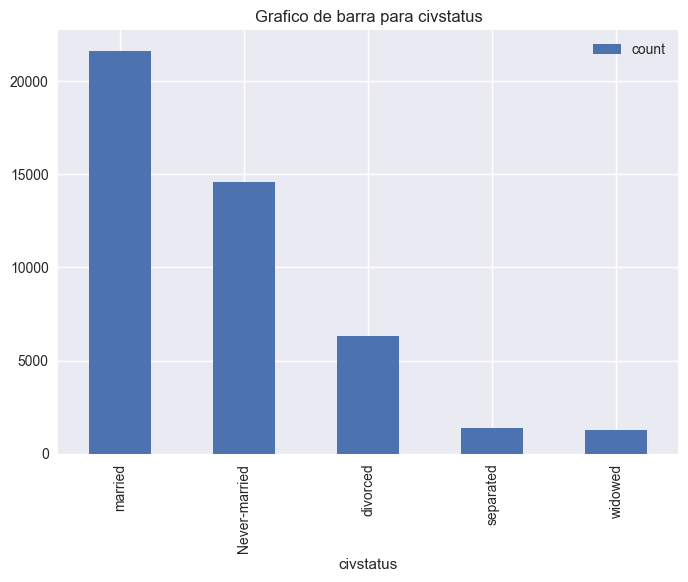

In [35]:
fp.plot_freq(df, "civstatus")

**Comentario:** La variable married es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas observaciones en viudos y separados, la mayoria de las personas estan casadas, pero los never-married igual tienen un cifra considerable

In [36]:
df["Never-married"] = np.where(df["civstatus"] == "Never-married", 1, 0)
df["divorced"] = np.where(df["civstatus"] == "divorced", 1, 0)
df["separated"] = np.where(df["civstatus"] == "separated", 1, 0)
df["widowed"] = np.where(df["civstatus"] == "widowed", 1, 0)

In [37]:
cambio_nombre_col(df, "native-country", "region")

In [38]:
df = df.replace(["Philippines","India", "China", "Japan", "Vietnam", "Iran", "Taiwan", "Thailand",
                "Cambodia", "Hong", "Laos"], 
                ["Asia","Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia"])

In [39]:
df = df.replace(["United-States","Mexico", "Puerto-Rico", "Canada", "El-Salvador", "Cuba", "Jamaica", "Dominican-Republic",
                "Guatemala", "Columbia", "Haiti", "Nicaragua", "Peru", "Ecuador", "Trinadad&Tobago", "Outlying-US(Guam-USVI-etc)",
                "Honduras"], 
                ["America","America", "America", "America", "America", "America", "America", "America", "America", "America",
                 "America", "America", "America", "America", "America", "America", "America"])

In [40]:
df = df.replace(["Germany","England", "Italy", "Poland", "Portugal", "Greece", "Ireland", "France",
                "Yugoslavia", "Scotland", "Hungary","Holand-Netherlands"], 
                ["Europa","Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa",
                "Europa"])

In [41]:
df = df.replace(["South"], 
                ["Africa"])

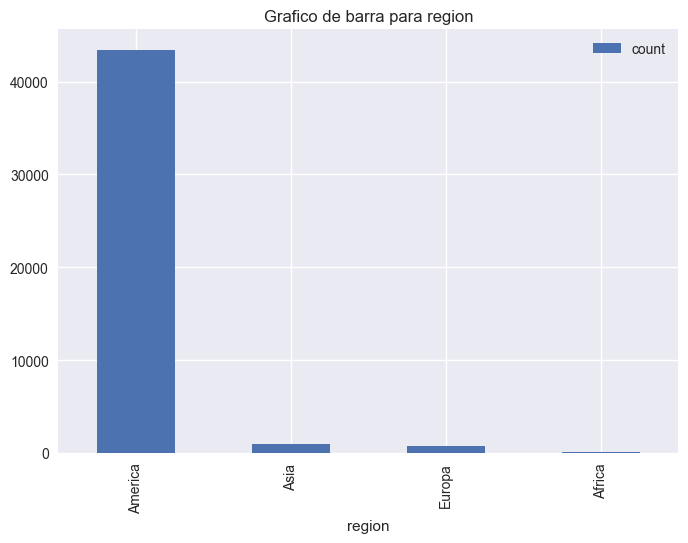

In [42]:
fp.plot_freq(df, "region")

**Comentario:** La variable America es la de mayor frecuencia, al recodificar esta se dejara fuera. America tiene demasiadas observaciones, quizas habria que aplicar otro preprocesamiento aca, no estoy seguro si tambien al tener muchas observaciones de una sola variable puede producir algun tipo de sesgo o sobreajuste.

In [43]:
df["Asia"] = np.where(df["region"] == "Asia", 1, 0)
df["Africa"] = np.where(df["region"] == "Africa", 1, 0)
df["Europa"] = np.where(df["region"] == "Europa", 1, 0)

d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_2\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


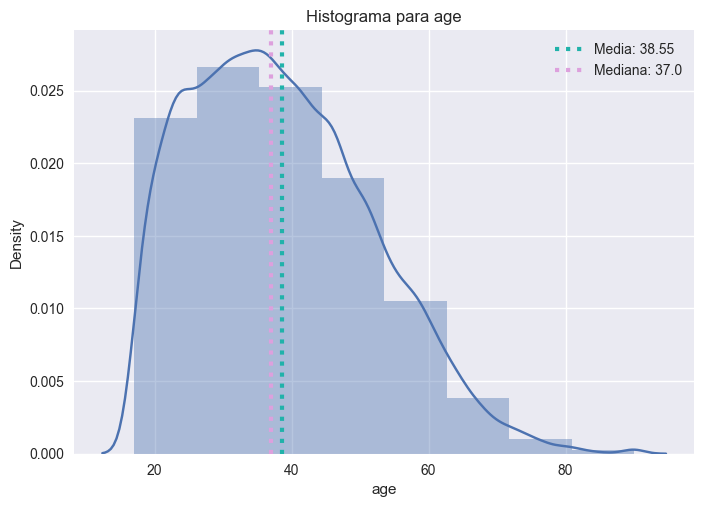

In [44]:
fp.plot_hist(df, "age");

**Comentario:** En la variable age, el minimo es 17 y el maximo 90, existe una concentracion entre los 17 y casi los 55 que corresponde a quizas se concentro la muestra en personas que estaban trabajando. La media y mediana se encuentran relativamente cerca, pero no en el centro de la curva. visualmente no tiende a una curva normal.

d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_2\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


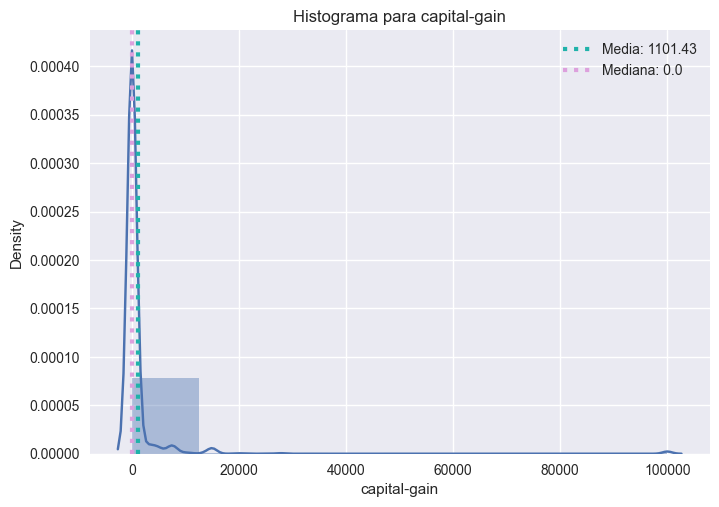

In [45]:
fp.plot_hist(df, "capital-gain");

In [46]:
df["capital-gain"] = np.where(df["capital-gain"] > 0, 1, 0)

**Comentario**: En la variable capital-gain, el minimo es 0 y el maximo 99999, existe una concentracion o acumulacion de 0 (hasta el 75% de los datos segun el describe existen 0). Recodifique la variable como los valores 0 igual a 0, y mayor a 0 como 1

d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_2\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


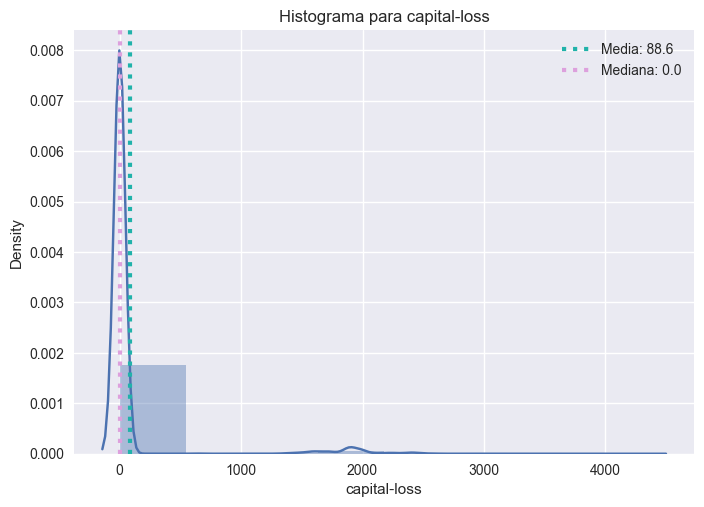

In [47]:
fp.plot_hist(df, "capital-loss");

In [48]:
df["capital-loss"] = np.where(df["capital-loss"] > 0, 1, 0)

**Comentario:** En la variable capital-loss, el minimo es 0 y el maximo 4356, existe una concentracion o acumulacion de 0 (hasta el 75% de los datos segun el describe existen 0). Recodifique la variable como los valores 0 igual a 0, y mayor a 0 como 1

d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_2\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


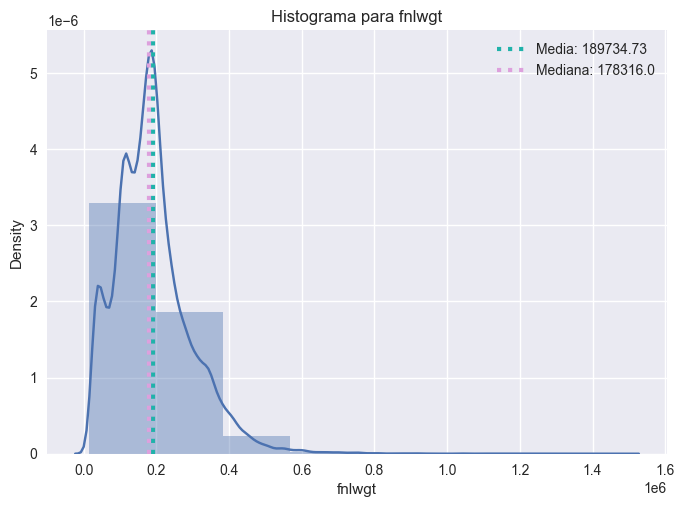

In [49]:
fp.plot_hist(df, "fnlwgt");

**Comentario:** Es un ponderador no sabria interpretar

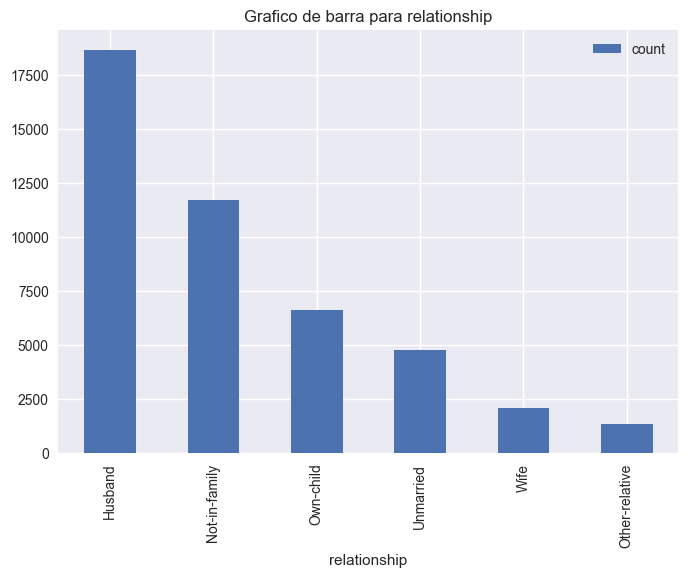

In [50]:
fp.plot_freq(df, "relationship")

**Comentario:** La variable Husband es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas las personas other-relative, la mayoria son husband, lo que tambien corresponde que la mayoria de encuestados eran hombres. Hay pocas wife en la muestra.

In [51]:
df["Not-in-family"] = np.where(df["relationship"] == "Not-in-family", 1, 0)
df["Own-child"] = np.where(df["relationship"] == "Own-child", 1, 0)
df["Unmarried"] = np.where(df["relationship"] == "Unmarried", 1, 0)
df["Wife"] = np.where(df["relationship"] == "Wife", 1, 0)
df["Other-relative"] = np.where(df["relationship"] == "Other-relative", 1, 0)

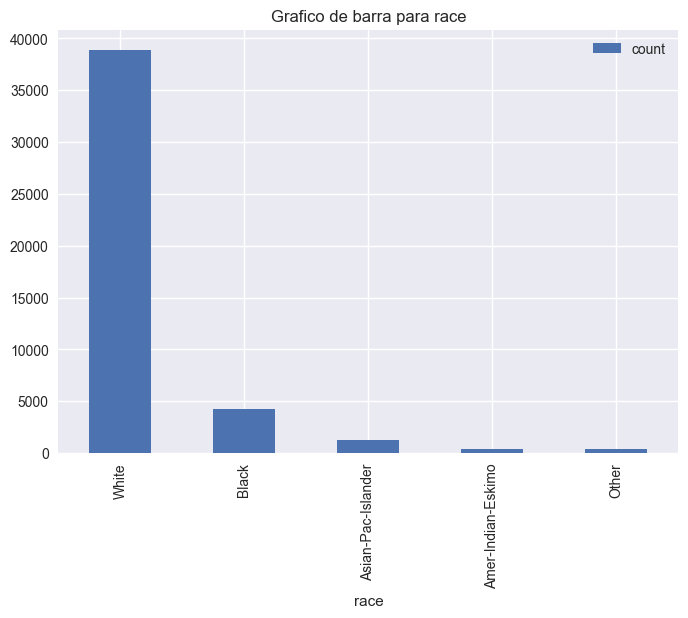

In [52]:
fp.plot_freq(df, "race")

**Comentario:** La variable White es la de mayor frecuencia, al recodificar esta se dejara fuera. Son muy pocas observaciones de las otras variables.

In [53]:
df["Black"] = np.where(df["race"] == "Black", 1, 0)
df["Asian-Pac-Islander"] = np.where(df["race"] == "Asian-Pac-Islander", 1, 0)
df["Amer-Indian-Eskimo"] = np.where(df["race"] == "Amer-Indian-Eskimo", 1, 0)
df["r_Other"] = np.where(df["race"] == "Other", 1, 0)

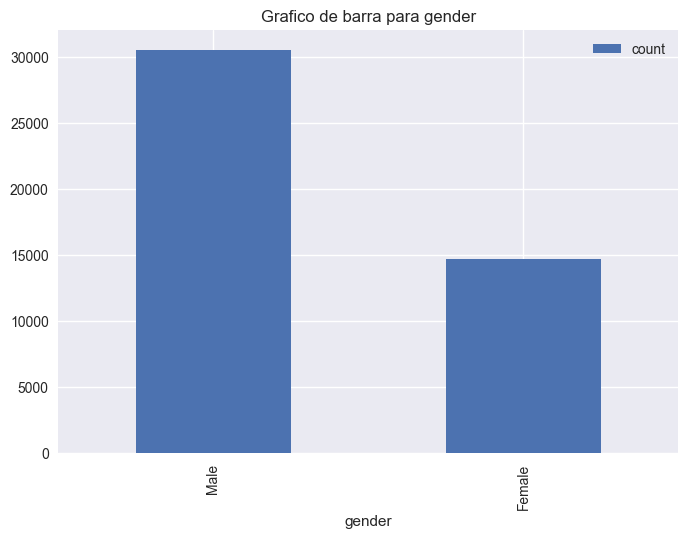

In [54]:
fp.plot_freq(df, "gender")

**Comentario:** La variable Male es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Tiene relacion con el grafico de relationship, se puede que la mayoria de male, aunque aca se puede ver que casi la mitad de female, lo que no se apreciaba en el otro grafico

In [55]:
df["gender"] = np.where(df["gender"] == "Female", 1, 0)


d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_2\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


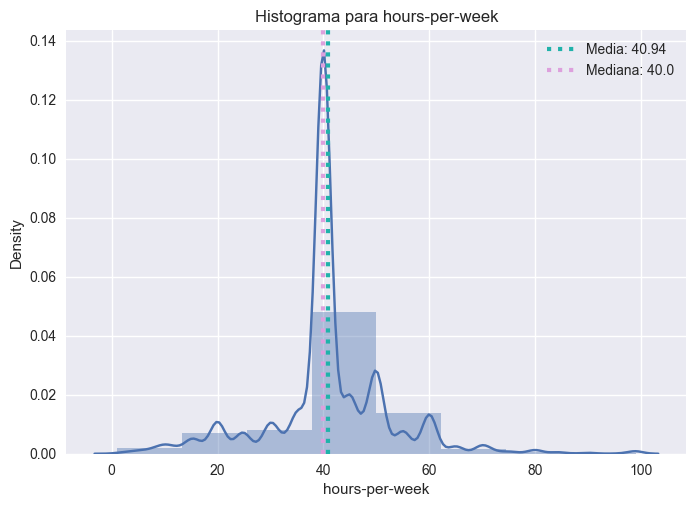

In [56]:
fp.plot_hist(df, "hours-per-week");

En la variable hours-per-week, el minimo es 1 y el maximo 99, existe una concentracion entre los 38 y casi los 50 aprox. que corresponde a quizas a la jornada normal de trabajo. La media y mediana se encuentran relativamente cerca, tambien cerca en el centro de la curva. visualmente no tiende a una curva normal, quizas si hubieran mas datos tendrian mas forma de normal, ya que tiene una curtosis muy grande